# K-Means Clustering
# When working with unsupervised learning methods, its usually important to lay out a general goal. In our example, we will attempt to find reasonable clusters of customers for marketing segmentation and study. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

<AxesSubplot:xlabel='contact', ylabel='count'>

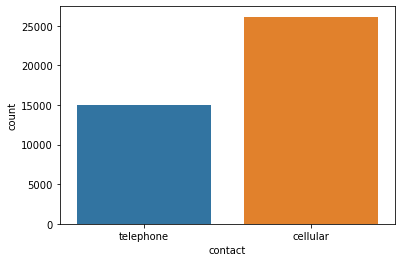

In [7]:
sns.countplot(data=df, x='contact')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

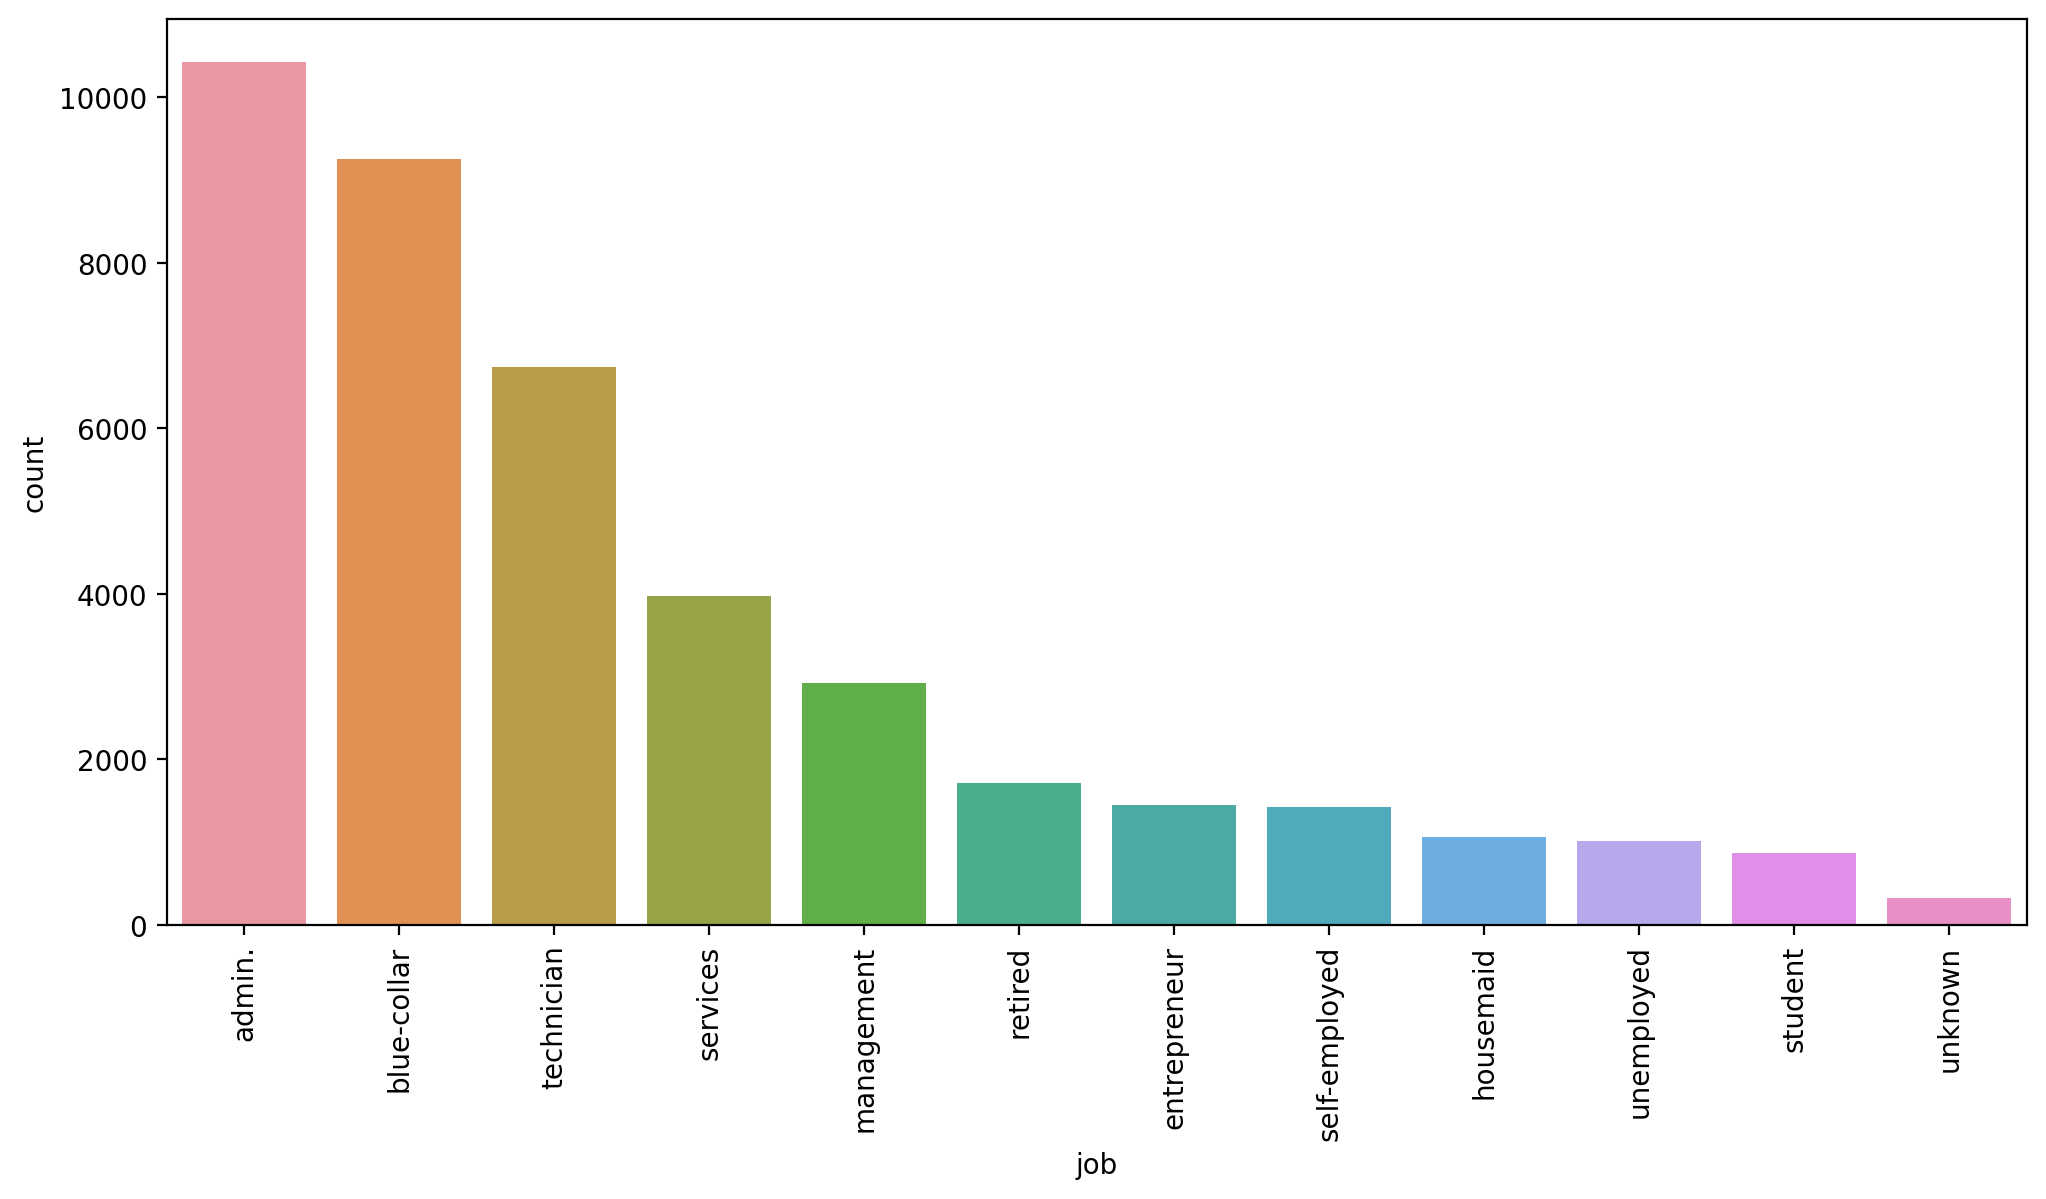

In [8]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90)

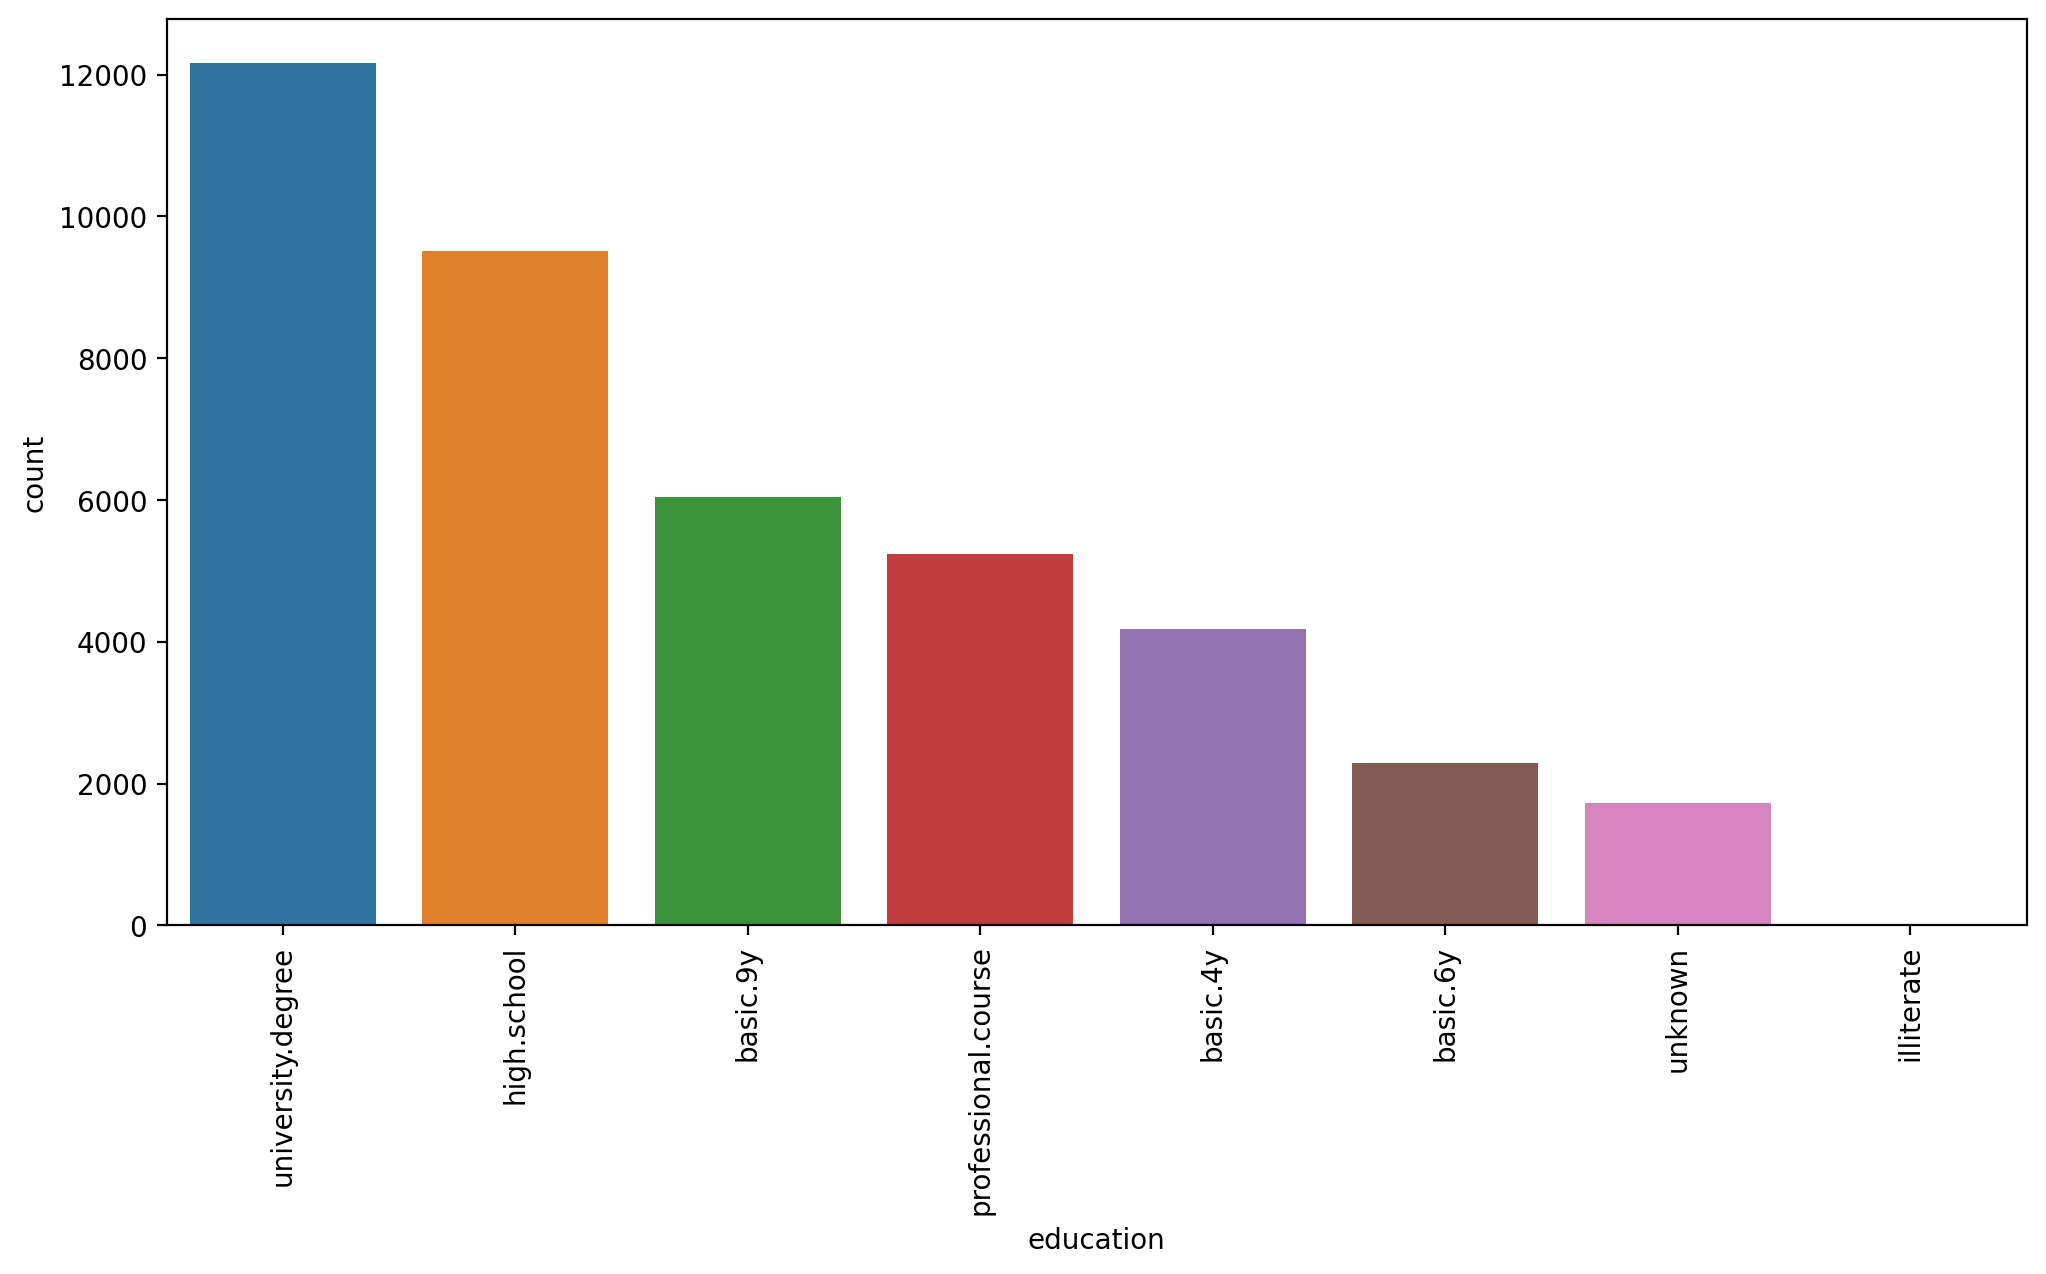

In [9]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

### Clustering
### Data Perparation
### UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!!! NO LABEL TO TEST AGAINST

### We do need to transform categorical features into numeric ones where makes sense to do so, as well as scaling the data due to distance being a key factor in clustering

In [10]:
X = pd.get_dummies(df)

In [11]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [39]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

In [40]:
cluster_labels = model.fit_predict(scaled_X)

In [41]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
len(scaled_X)

41188

In [43]:
len(cluster_labels)

41188

In [46]:
X['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,Cluster
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


<AxesSubplot:>

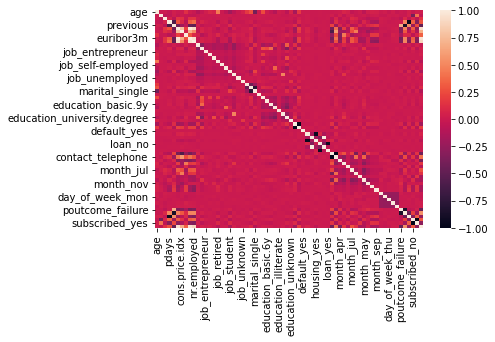

In [21]:
sns.heatmap(X.corr())

<AxesSubplot:>

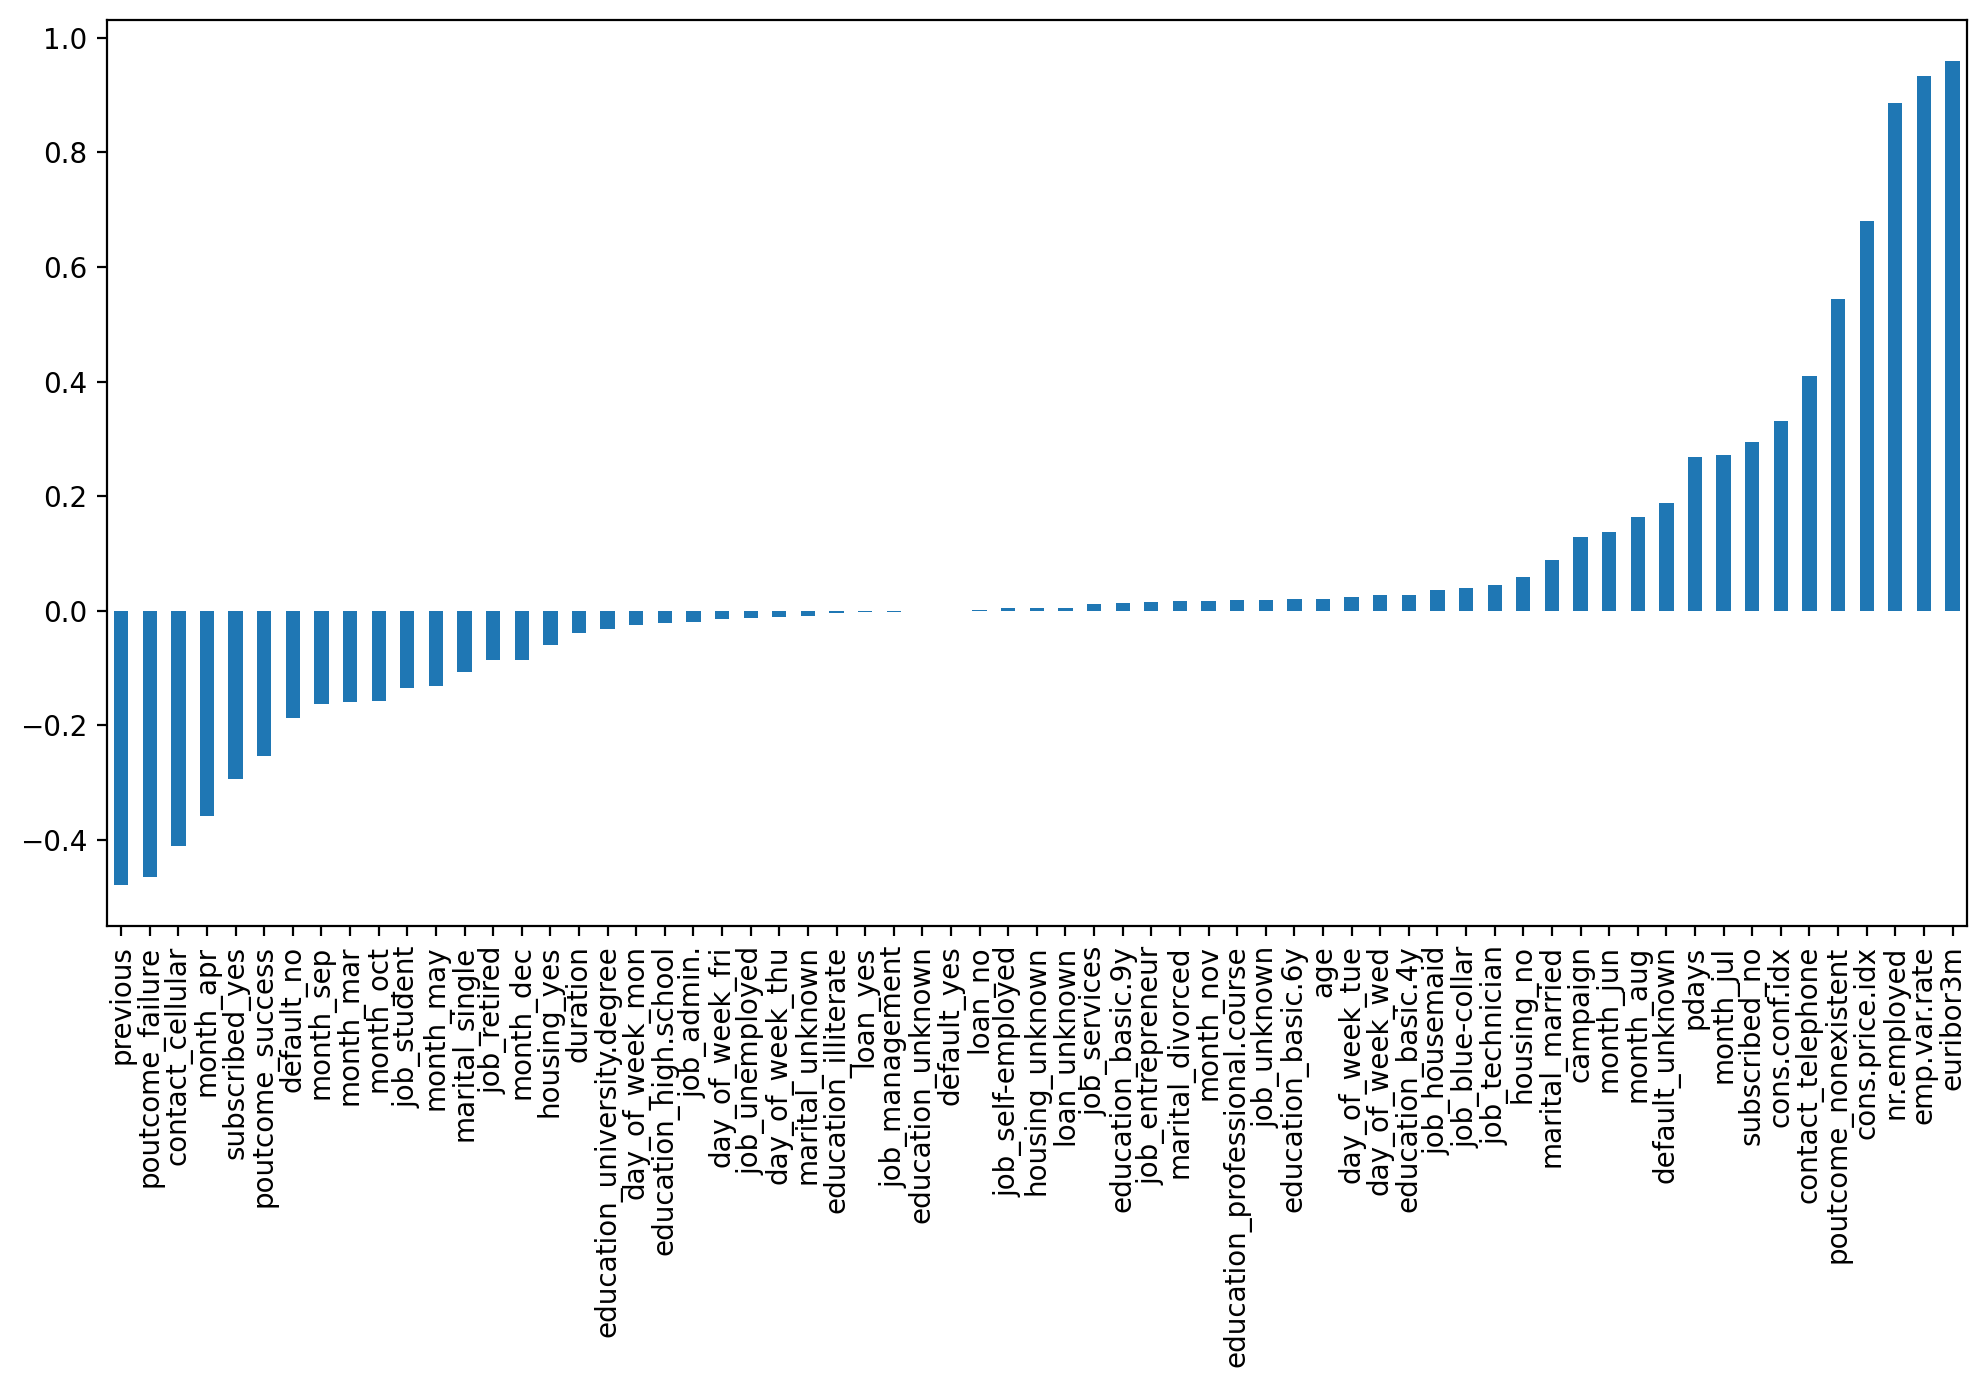

In [23]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [24]:
# elbow method
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distance')

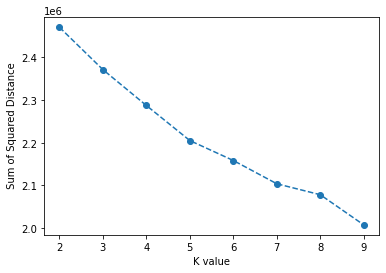

In [27]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel("K value")
plt.ylabel(" Sum of Squared Distance")

In [57]:
model = KMeans(n_clusters=5)

In [58]:
cluster_labels = model.fit_predict(scaled_X)

In [59]:
X['Cluster'] = cluster_labels

<AxesSubplot:>

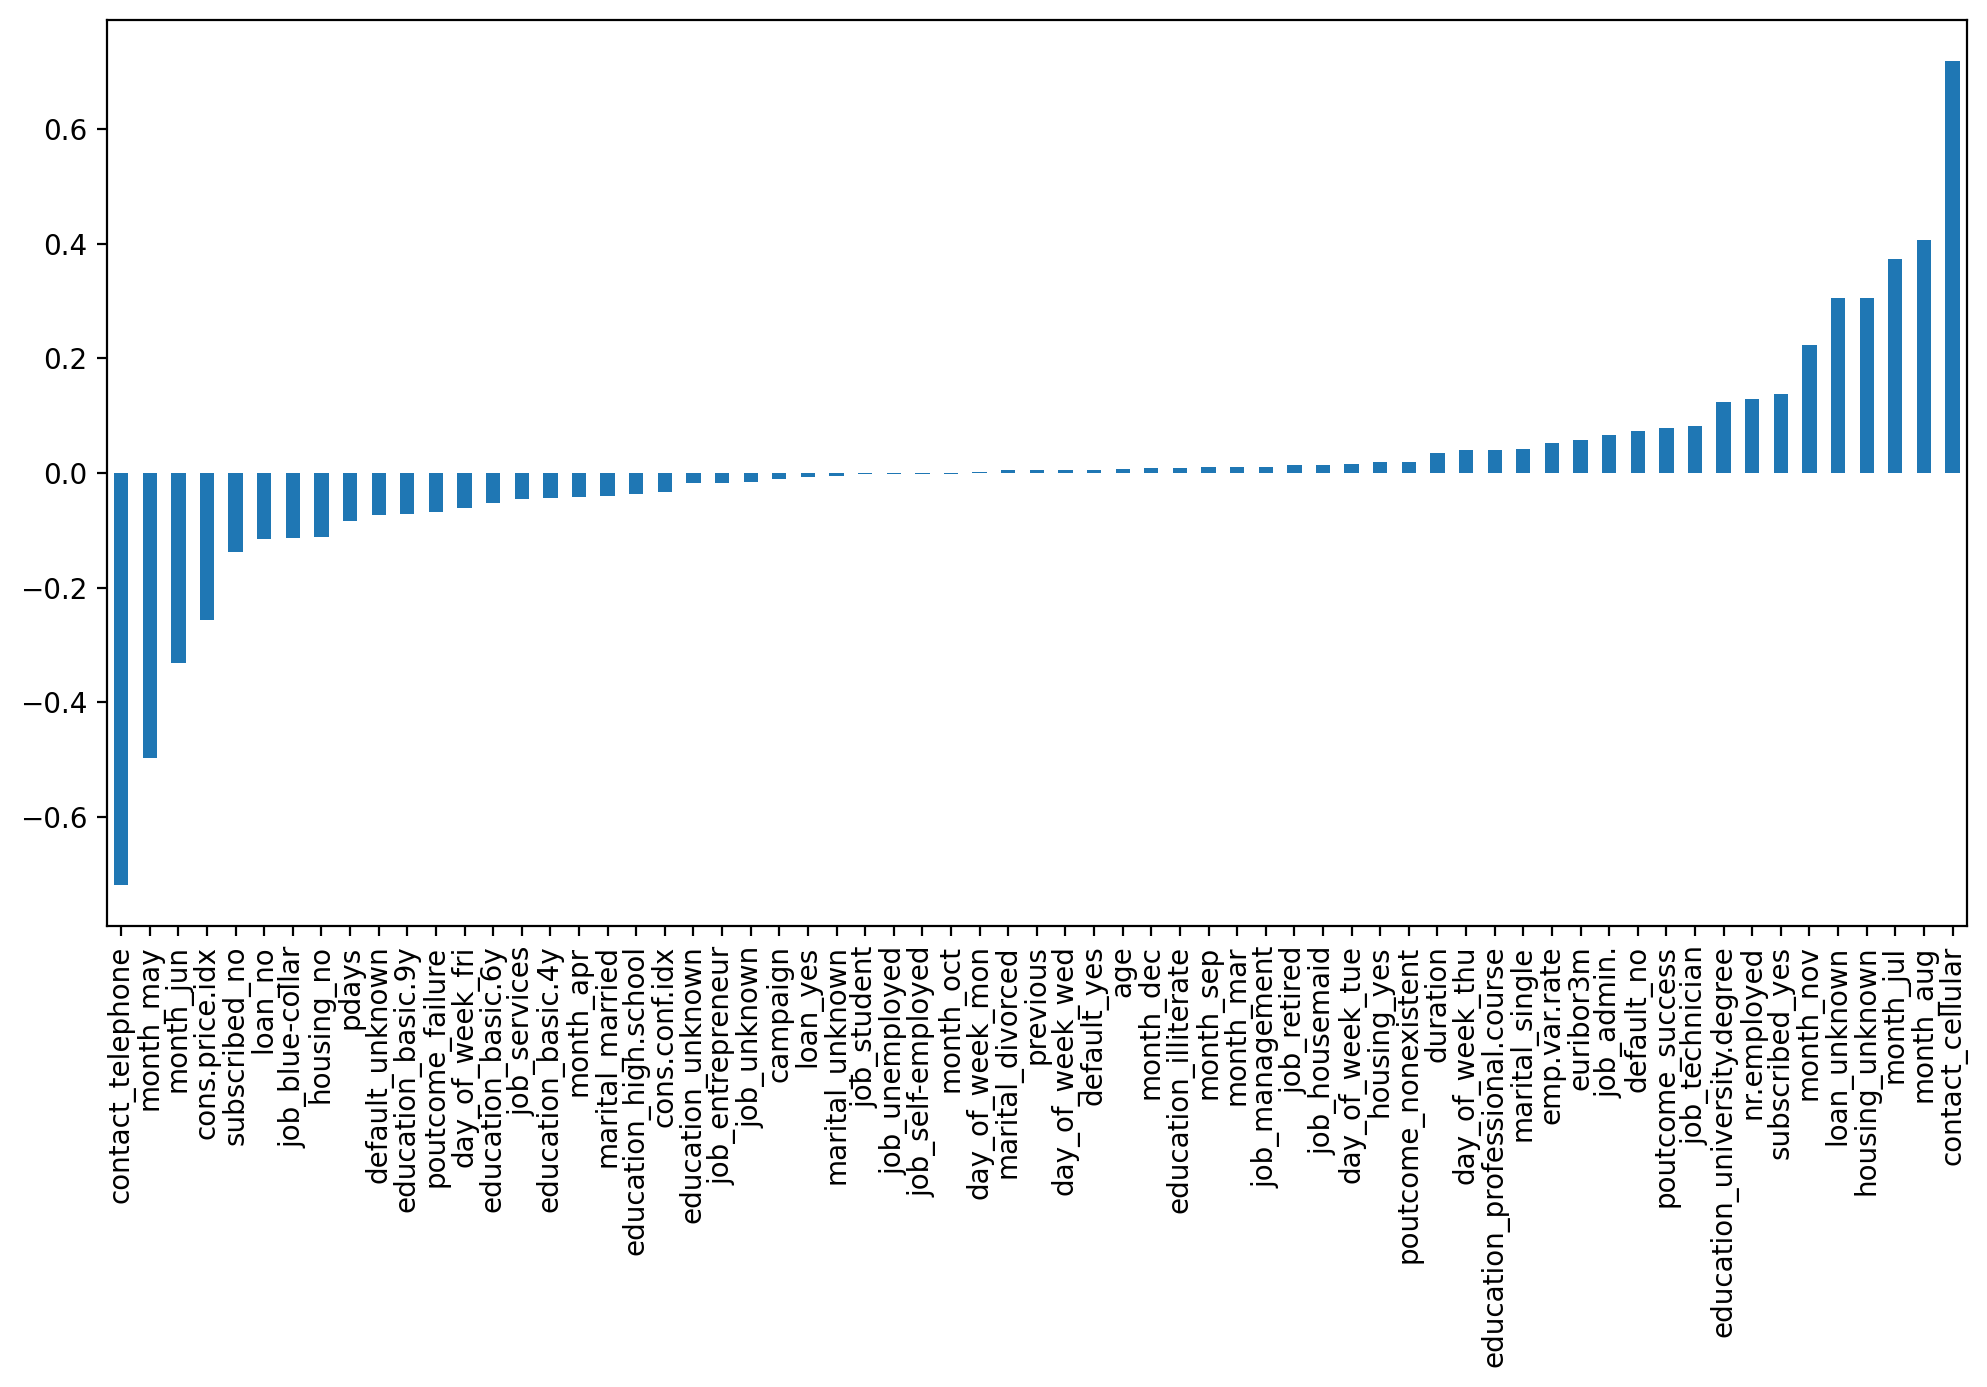

In [60]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [61]:
ssd

[2469792.378228215,
 2370786.920420711,
 2286937.1949723694,
 2204983.4409496305,
 2158387.8222326436,
 2104013.414918943,
 2078410.0498971024,
 2007868.6407083701]

<AxesSubplot:>

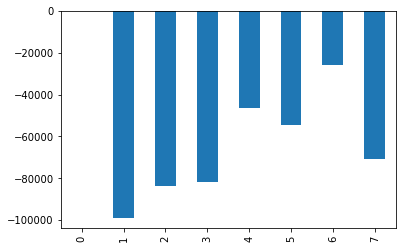

In [62]:
pd.Series(ssd).diff().plot(kind='bar')

In [63]:
pd.Series(ssd).diff()

0             NaN
1   -99005.457808
2   -83849.725448
3   -81953.754023
4   -46595.618717
5   -54374.407314
6   -25603.365022
7   -70541.409189
dtype: float64

In [54]:
df['Cluster'] = cluster_labels

In [56]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,Cluster
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,5
